In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import lightgbm as lgbm
import structureboost as stb
import ml_insights as mli
from structureboost import log_loss
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)

In [33]:
mainDf = pd.read_csv('CombinedWithWinDashesChanged.csv')
print(mainDf.shape)

(16073, 969)


In [34]:
irrelevant_stats = [
    "date", 
    "gamePk", 
    "total_1_home", 
    "pitch_percentage_1_home", 
    "total_vs_hand_1_home", 
    "pitch_percentage_vs_hand_1_home", 
    "total_2_home", 
    "pitch_percentage_2_home", 
    "total_vs_hand_2_home", 
    "pitch_percentage_vs_hand_2_home", 
    "total_3_home", 
    "pitch_percentage_3_home", 
    "total_vs_hand_3_home", 
    "pitch_percentage_vs_hand_3_home", 
    "total_4_home", 
    "pitch_percentage_4_home", 
    "total_vs_hand_4_home", 
    "pitch_percentage_vs_hand_4_home", 
    "total_5_home", 
    "pitch_percentage_5_home", 
    "total_vs_hand_5_home", 
    "pitch_percentage_vs_hand_5_home", 
    "total_6_home", 
    "pitch_percentage_6_home", 
    "total_vs_hand_6_home", 
    "pitch_percentage_vs_hand_6_home", 
    "total_7_home", 
    "pitch_percentage_7_home", 
    "total_vs_hand_7_home", 
    "pitch_percentage_vs_hand_7_home", 
    "total_8_home", 
    "pitch_percentage_8_home", 
    "total_vs_hand_8_home", 
    "pitch_percentage_vs_hand_8_home", 
    "total_9_home", 
    "pitch_percentage_9_home", 
    "total_vs_hand_9_home", 
    "pitch_percentage_vs_hand_9_home", 
    "total_pitch_home", 
    "pitch_percentage_pitch_home", 
    "total_pitch_home_1", 
    "pitch_percentage_pitch_home_1", 
    "total_bullpen_home", 
    "pitch_percentage_bullpen_home", 
    "total_1_away", 
    "pitch_percentage_1_away", 
    "total_vs_hand_1_away", 
    "pitch_percentage_vs_hand_1_away", 
    "total_2_away", 
    "pitch_percentage_2_away", 
    "total_vs_hand_2_away", 
    "pitch_percentage_vs_hand_2_away", 
    "total_3_away", 
    "pitch_percentage_3_away", 
    "total_vs_hand_3_away", 
    "pitch_percentage_vs_hand_3_away", 
    "total_4_away", 
    "pitch_percentage_4_away", 
    "total_vs_hand_4_away", 
    "pitch_percentage_vs_hand_4_away", 
    "total_5_away", 
    "pitch_percentage_5_away", 
    "total_vs_hand_5_away", 
    "pitch_percentage_vs_hand_5_away", 
    "total_6_away", 
    "pitch_percentage_6_away", 
    "total_vs_hand_6_away", 
    "pitch_percentage_vs_hand_6_away", 
    "total_7_away", 
    "pitch_percentage_7_away", 
    "total_vs_hand_7_away", 
    "pitch_percentage_vs_hand_7_away", 
    "total_8_away", 
    "pitch_percentage_8_away", 
    "total_vs_hand_8_away", 
    "pitch_percentage_vs_hand_8_away", 
    "total_9_away", 
    "pitch_percentage_9_away", 
    "total_vs_hand_9_away", 
    "pitch_percentage_vs_hand_9_away", 
    "total_pitch_away", 
    "pitch_percentage_pitch_away", 
    "total_pitch_away_1", 
    "pitch_percentage_pitch_away_1", 
    "total_bullpen_away", 
    "pitch_percentage_bullpen_away"
]

mainDf = mainDf.drop(labels = irrelevant_stats, axis = 'columns')
oddsDf = pd.read_csv('DashesChangedOddsDataTest.csv')

trainX = mainDf.iloc[:13000,:]
validX = mainDf.iloc[13000:14500,:]
testX = mainDf.iloc[14500:,:]

trainY = trainX['home_win'].to_numpy()
validY = validX['home_win'].to_numpy()
testY = testX['home_win'].to_numpy()

trainX = trainX.drop("home_win", axis='columns')
validX = validX.drop("home_win", axis='columns')
testX = testX.drop("home_win", axis='columns')

#print(train)
print(mainDf.shape)
print(trainX.shape)
#print(valid)
print(validX.shape)
#print(test)
print(testX.shape)


(16073, 883)
(13000, 882)
(1500, 882)
(1573, 882)


In [35]:
lgbm1 = lgbm.LGBMClassifier(n_estimators=1000, learning_rate=.02, max_depth=2)
lgbm1.fit(trainX, trainY, eval_set=(validX, validY), eval_metric='logloss', 
          callbacks=[lgbm.early_stopping(stopping_rounds=50), lgbm.log_evaluation(10)])

[LightGBM] [Info] Number of positive: 6951, number of negative: 6049
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.378630 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 186993
[LightGBM] [Info] Number of data points in the train set: 13000, number of used features: 882
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534692 -> initscore=0.138993
[LightGBM] [Info] Start training from score 0.138993
Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.677966
[20]	valid_0's binary_logloss: 0.669811
[30]	valid_0's binary_logloss: 0.663681
[40]	valid_0's binary_logloss: 0.659042
[50]	valid_0's binary_logloss: 0.655282
[60]	valid_0's binary_logloss: 0.652382
[70]	valid_0's binary_logloss: 0.649627
[80]	valid_0's binary_logloss: 0.647179
[90]	valid_0's binary_logloss: 0.645212
[100]	valid_0's binary_logloss: 0.643703
[110]	valid_0's binary_logloss: 0.642291
[120

LGBMClassifier(learning_rate=0.02, max_depth=2, n_estimators=1000)

In [36]:

hv_mean = mainDf['home_win'].sum() / 16074
preds_lgbm = lgbm1.predict_proba(testX)[:,1]
log_loss(testY, preds_lgbm), log_loss(testY, oddsDf.combinedOdds), log_loss(testY, hv_mean*np.ones(len(testY)))

(0.6354388296267661, 0.6766577841295751, 0.6925878945236387)

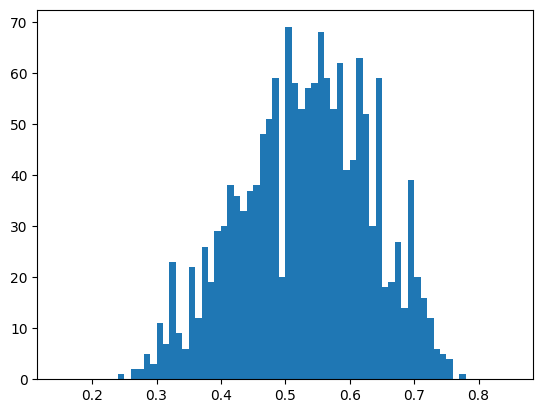

In [37]:
plt.hist(oddsDf.combinedOdds, bins=np.linspace(.15,.85,71));

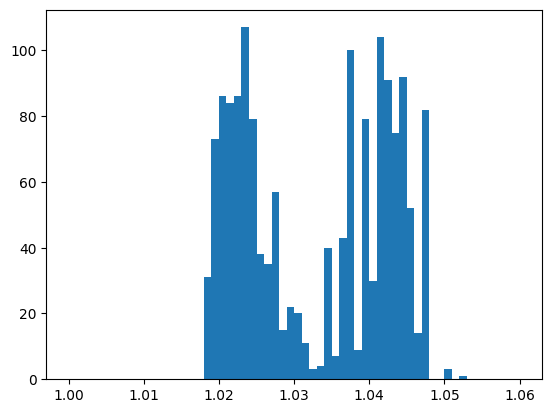

In [38]:
plt.hist(oddsDf.homeDec + oddsDf.awayDec, bins=np.linspace(1,1.06,61));

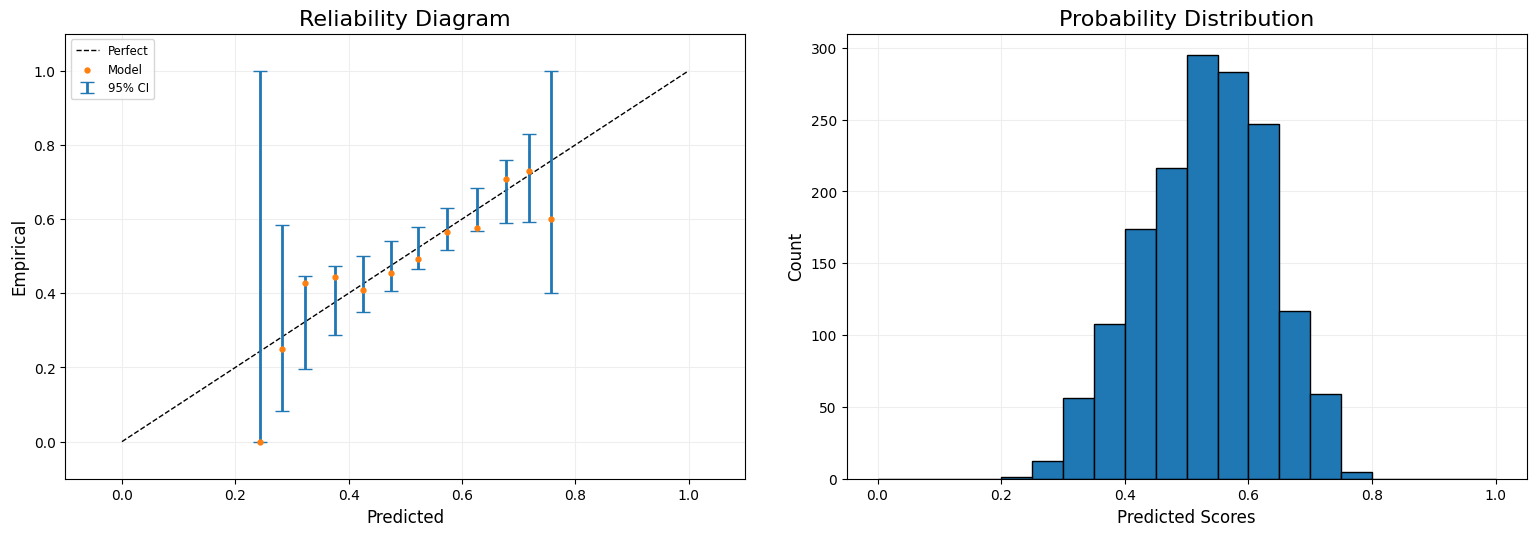

In [39]:
plt.figure(figsize=(16,6))
mli.plot_reliability_diagram(testY, oddsDf.combinedOdds, show_histogram=True);

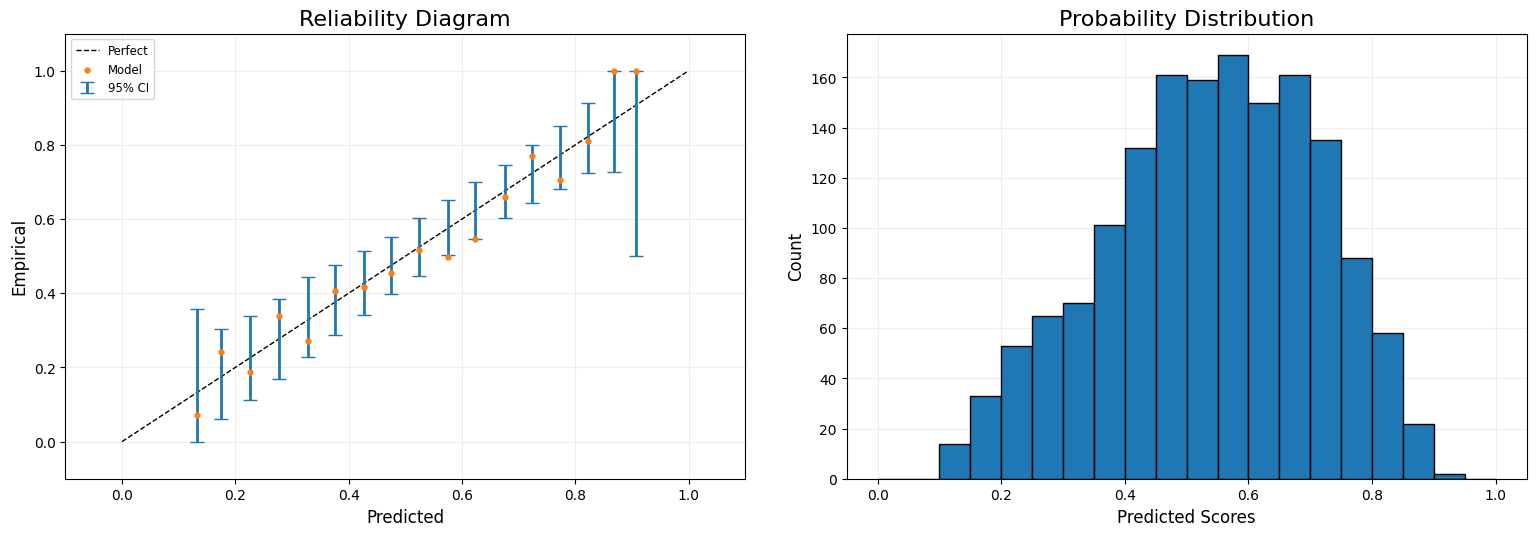

In [40]:
plt.figure(figsize=(16,6))
mli.plot_reliability_diagram(testY, preds_lgbm, show_histogram=True);

In [41]:
hcPreds = np.abs(preds_lgbm < .15)
#print(hcPreds[True])
testX[hcPreds]

pa_1_home  ab_1_home  bip_1_home  hits_1_home  k_percentage_1_home  \
14877        113         99          79           21                 19.5   
14940        106         92          73           21                 18.9   
14951        110        100          85           28                 14.5   
15036         88         85          66           19                 21.6   
15133         16         15          10            4                 31.3   
15424         25         23          16            6                 32.0   
15562         49         45          35            9                 20.4   
15632         78         72          55           15                 21.8   
15670        104         99          83           24                 15.4   
15705         65         53          48           20                  7.7   
15773        120        107          84           26                 19.2   
15824        120        108          88           28                 16.7   
15894        121        115          95           37                 17.4   
15929         63         60          51           20                 14.3   

       bb_percentage_1_home  swings_1_home  ba_1_home  xba_1_home  obp_1_home  \
14877                   8.0            237      0.212       0.238       0.292   
14940                   9.4            219      0.228       0.245       0.321   
14951                   7.3            225      0.280       0.338       0.336   
15036                   3.4            166      0.224       0.206       0.250   
15133                   6.3             35      0.267       0.089       0.313   
15424                   4.0             44      0.261       0.259       0.280   
15562                   6.1             97      0.200       0.310       0.265   
15632                   7.7            129      0.208       0.246       0.269   
15670                   1.9            163      0.242       0.264       0.279   
15705                  13.8            104      0.377       0.333       0.492   
15773                   9.2            205      0.243       0.258       0.325   
15824                   8.3            206      0.259       0.272       0.333   
15894                   3.3            229      0.322       0.305       0.347   
15929                   4.8            126      0.333       0.215       0.365   

       xobp_1_home  slg_1_home  xslg_1_home  woba_1_home  xwoba_1_home  \
14877        0.322       0.333        0.339        0.277         0.300   
14940        0.337       0.337        0.340        0.295         0.305   
14951        0.394       0.380        0.540        0.315         0.401   
15036        0.234       0.329        0.306        0.252         0.235   
15133        0.146       0.533        0.154        0.352         0.140   
15424        0.285       0.565        0.494        0.344         0.331   
15562        0.366       0.333        0.417        0.264         0.347   
15632        0.304       0.389        0.449        0.285         0.324   
15670        0.299       0.444        0.423        0.309         0.313   
15705        0.456       0.585        0.511        0.463         0.426   
15773        0.338       0.374        0.363        0.309         0.313   
15824        0.345       0.454        0.413        0.340         0.332   
15894        0.331       0.635        0.579        0.408         0.382   
15929        0.253       0.500        0.292        0.372         0.241   

       babip_1_home  iso_1_home  ev_1_home  adj_ev_1_home  \
14877         0.256       0.121       87.1           90.9   
14940         0.278       0.109       85.9           91.0   
14951         0.313       0.100       90.5           92.1   
15036         0.266       0.106       84.6           90.8   
15133         0.400       0.267       86.5           90.4   
15424         0.286       0.304       93.5           92.0   
15562         0.235       0.133       80.2           90.5   
15632         0.216       0.181     

In [42]:
ll_test = log_loss(testY, preds_lgbm)
preds_lgbm_test = lgbm1.predict_proba(testX)[:,1]
sv_lgbm = lgbm1.predict(testX, pred_contrib=True)
sv_lgbm = pd.DataFrame(sv_lgbm)
sv_lgbm.columns = list(testX.columns)+['Intercept']
sv_vec = sv_lgbm.abs().mean().sort_values(ascending=False)
print('\nAvg Shap Vals')
    
print(sv_vec)   



Avg Shap Vals
woba_pitch_away                       0.224740
woba_pitch_home                       0.191403
Intercept                             0.153291
woba_bullpen_away                     0.080352
slg_pitch_away                        0.061629
iso_8_away                            0.039698
slg_pitch_home                        0.037625
obp_pitch_home                        0.037010
woba_2_home                           0.034203
iso_pitch_home                        0.032143
xslg_5_away                           0.031789
woba_bullpen_home                     0.031389
woba_7_away                           0.031138
obp_9_home                            0.031106
iso_9_away                            0.029785
hits_bullpen_home                     0.029075
slg_bullpen_away                      0.028906
iso_bullpen_away                      0.024449
xba_6_home                            0.022757
iso_pitch_away                        0.022489
woba_1_away                           0.02201

In [88]:
def buildBetCsv(predsnp, testXDf, testYnp, oddsDf):
    predsDf = pd.DataFrame(data = predsnp, columns = ["home_win_preds"])
    testYDf = pd.DataFrame(data = testYnp, columns = ["home_win"])
    testXDf = testXDf.reset_index()
    #print(testXDf)
    #print(predsDf)
    justOddsDf = oddsDf.filter(['homeDec', 'awayDec', 'combinedOdds'])
    #print(justOddsDf)
    #print(oddsDf["homeDec", "awayDec","combinedOdds"])
    betAnalysis = pd.concat([testXDf, testYDf, justOddsDf, predsDf], axis = 1)
    betAnalysis = betAnalysis.drop("index", axis='columns')

    #print(betAnalysis)

    betDf = pd.DataFrame(data = [], columns = ["home_bet", "away_bet", "home_net", "away_net", "net_bets"])
    
    for ind in betAnalysis.index:
        homeWin = float(betAnalysis['home_win'][ind])
        predOddsHome = float(betAnalysis['home_win_preds'][ind])
        predOddsAway = 1 - predOddsHome
        homeLine = float(betAnalysis['homeDec'][ind])
        awayLine = float(betAnalysis['awayDec'][ind])
        homeBet = 0
        awayBet = 0

        if predOddsHome - homeLine > .1:
            homeBet = 1
        if predOddsAway - awayLine > .1:
            awayBet = 1
        if predOddsHome - homeLine > .1:
            homeBet = 2
        if predOddsAway - awayLine > .1:
            awayBet = 2
        if predOddsHome - homeLine > .2:
            homeBet = 3
        if predOddsAway - awayLine > .2:
            awayBet = 3
        if predOddsHome - homeLine > .3:
            homeBet = 4
        if predOddsAway - awayLine > .3:
            awayBet = 4
        
        
        #print(int(betAnalysis['awayDec'][ind]))

        if homeWin == 1:
            homeNet = (homeBet / homeLine) - homeBet
            awayNet = (-1 * awayBet)
        if homeWin == 0:
            awayNet = (awayBet / awayLine) - awayBet
            homeNet = (-1 * homeBet)

        gameNet = homeNet + awayNet

        betData = [homeBet, awayBet, homeNet, awayNet, gameNet]
        curGameBet = pd.DataFrame([betData], columns = ["home_bet", "away_bet", "home_net", "away_net", "net_bets"])
        betDf = pd.concat([betDf, curGameBet], axis=0)
    
    #print(betAnalysis.columns)
    #print(betDf.columns)
    #betAnalysis = pd.concat([betAnalysis, betDf], axis=1)
    return betDf

#print(testX)
test = buildBetCsv(preds_lgbm, testX, testY, oddsDf)
print(test['net_bets'].sum())

test.to_csv('simulatedBets.csv', index=False)


C:\Users\nhleo\AppData\Local\Temp\ipykernel_6040\1510821023.py:57: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  betDf = pd.concat([betDf, curGameBet], axis=0)


622.9994848675278
